# Data Fitting with Least Squares

In [4]:
import numpy as np
import numpy.linalg as npla
import scipy.linalg as spla
import matplotlib.pyplot as pt

Suppose we are modeling a relationship between $x$ and $y$, and the "true" relationship is $y = a+bx$:

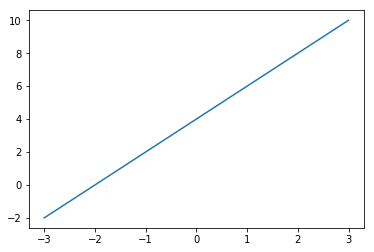

In [5]:
a = 4
b = 2

def f(x):
    return a + b*x

plot_grid = np.linspace(-3, 3, 100)

pt.plot(plot_grid, f(plot_grid))

But suppose we don't know $a$ and $b$, but instead all we have is a few noisy measurements (i.e. here with random numbers added):

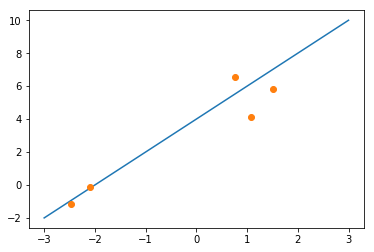

In [6]:
npts = 5

np.random.seed(22)
points = np.linspace(-2, 2, npts) + np.random.randn(npts)
values = f(points) + 0.3*np.random.randn(npts)*f(points)

pt.plot(plot_grid, f(plot_grid))
pt.plot(points, values, "o")

What's the system of equations for $a$ and $b$?

---------------
Now build the system matrix $M$--a Vandermonde matrix:

(We'll call it $M$ because $V$ conventionally used for the result of the SVD)

In [16]:
M = np.array([
    1+0*points,
    points,
    ]).T
M

array([[ 1.        , -2.09194992],
       [ 1.        , -2.46335065],
       [ 1.        ,  1.08179168],
       [ 1.        ,  0.76067483],
       [ 1.        ,  1.50887086]])

What's the right-hand side vector?

-------------
Now solve the least-squares system:

In [17]:
U, sigma, VT = npla.svd(M)

In [18]:
print(U.shape)
print(sigma.shape)
print(VT.shape)

(5, 5)
(2,)
(2, 2)


Determine $x$, from $U\Sigma V^T \mathbf x = \mathbf b$, where $\mathbf b$ is `values`:

In [24]:
x = VT.T@((U.T@values)[:2] / sigma)

Recover the computed $a$, $b$:

In [25]:
a_c, b_c = x

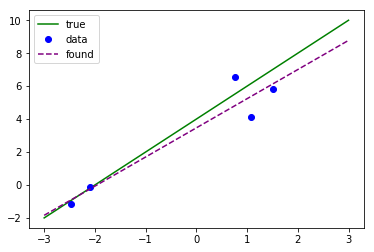

In [28]:
def f_c(x):
    return a_c + b_c * x

pt.plot(plot_grid, f(plot_grid), label="true", color="green")
pt.plot(points, values, "o", label="data", color="blue")
pt.plot(plot_grid, f_c(plot_grid), "--", label="found",color="purple",)

if 0:
    # show residual components
    pt.vlines(points,
                np.minimum(f_c(points), values),
                np.maximum(f_c(points), values),
                color="red", lw=2)

pt.legend(loc="best")

* If we enable 'show residual components above', what will appear?
* Is it possible for the residual to involve the 'true model'?

In [30]:

# - Little red bars connecting the data to the computed fit line.
# - No. The residual is only computed against the known data, not the unknown true model.

* What should happen if we change the number of data points?
* What happens if there are lots of outliers?
* What should happen if we don't add noise?
* What about a bigger model?
* What about different functions in the model?

In [31]:
# - The fit gets better
# - Least squares "punishes" outliers with the square of their distance. 
#   So outliers have a habit of severely wrecking a least squares fit.
# - We should recover the exact data.
# - No problem--just add coefficients.
# - No problem--just use a different Vandermonde matrix.